## Chapter 4

**Pauil algebra**

In Liouville space operators are "vectors", and superoperators are the matrices act on them.

$$\begin{split}
    & \sigma_x \sigma_y = i\sigma_z \\
    & \sigma_y \sigma_z = i\sigma_x \\
    & \sigma_z \sigma_x = i\sigma_y \\
    & \\
    & \sigma_x\sigma_x = I \\
    & \sigma_y\sigma_y = I \\
    & \sigma_z\sigma_z = I \\
    & \\
    & [\sigma_x, \sigma_y] = 2i\sigma_z \\
    & [\sigma_y, \sigma_z] = 2i\sigma_x \\
    & [\sigma_z, \sigma_x] = 2i\sigma_y \\
    & \\
    & \{\sigma_\alpha,\sigma_\beta\} = 2I\delta_{\alpha\beta} \\
\end{split}$$

**Flattened Pauli matrices**

row-majored vectorization of 2D Pauli matrices
$$\begin{matrix}
\sigma_x = \begin{pmatrix}0 & 1 \\ 1 & 0 \\\end{pmatrix} & \sigma_y = \begin{pmatrix}0 & -i \\ i & 0 \\\end{pmatrix} & \sigma_z = \begin{pmatrix} 1  & 0 \\ 0 & -1 \\\end{pmatrix} \\
\\
|\sigma_x\rangle\rangle = \begin{pmatrix}0 \\ 1 \\ 1 \\ 0 \\\end{pmatrix} & |\sigma_y\rangle\rangle = \begin{pmatrix}0 \\ -i \\ i \\ 0 \\\end{pmatrix} & |\sigma_z\rangle\rangle = \begin{pmatrix}1 \\ 0 \\ 0 \\ -1 \\\end{pmatrix} \\
\end{matrix}$$

$[\sigma_x,\sigma_y] = 2i\sigma_z \longrightarrow \begin{bmatrix}2i \\ 0 \\ 0 \\ -2i \\\end{bmatrix}$; 
$\left(\sigma_x\otimes I - I\otimes\sigma_x^\dagger\right)\sigma_y = \begin{bmatrix}2i \\ 0 \\ 0 \\ -2i \\\end{bmatrix}$

two ways are equivalent. 

### 4.2 Liouvillian

$$\begin{split}
    & \dot{\rho(t)} = -\frac{i}{\hbar} [H,\rho]_- \\
    & \hat{\hat{\mathcal{L}}} = -\frac{i}{\hbar}[H,(\cdot)] \\
    & \dot{\rho(t)} = \hat{\hat{\mathcal{L}}}\rho \\
\end{split}$$


Let $\{|i\rangle|i=1,2,\cdots\}$ be orthonormal basis set in Hilbert space, then 
$$\begin{split}
    & \rho = \sum_{ij}|i\rangle\langle i|\rho |j\rangle\langle j| = \sum_{ij} \rho_{ij} |i\rangle\langle j| \xrightarrow[]{\text{vectorization}}  \sum_{ij} \rho_{ij} |i\rangle \otimes |j\rangle = |\rho \rangle\rangle \\
    &  O\rho = \sum_{ij}\rho_{ij} O|i\rangle\langle j| \equiv \sum_{ij}\rho_{ij} \left(O\otimes I\right) |i\rangle\otimes |j\rangle = O\otimes I |\rho\rangle\rangle \\
    & \rho O = \sum_{ij}\rho_{ij} |i\rangle\langle j| O = \sum_{ij} \rho_{ij} |i\rangle \left(O^\dagger|j\rangle\right)^\dagger \equiv \sum_{ij}\rho_{ij} I\otimes O^\dagger |i\rangle \otimes |j\rangle = I\otimes O^\dagger |\rho\rangle\rangle \\
    & [O,\rho] = O\rho - \rho O  \Leftrightarrow \left(O\otimes I - I\otimes O^\dagger\right)|\rho\rangle\rangle, \\
\end{split}$$

$\left(O\otimes I - I\otimes O^\dagger\right)$ is now the superoperator in Liouville space. And $\mathcal{L} = -\frac{i}{\hbar}[H,(\cdot)]$ in Liouville space is $\hat{\hat{\mathcal{L}}} = -\frac{i}{\hbar} \left(H \otimes I - I \otimes H \right)$


Matrix elements depend on the choice of basis. In Pauli basis the matrix element can be computed as
$$\begin{split}
& \langle\langle\sigma_x | \hat{\hat{\mathcal{L}}} | \sigma_y \rangle\rangle = -\frac{i}{\hbar}\langle\langle \sigma_x| [H,\sigma_y] \\
& = -\frac{i}{\hbar} \langle\langle \sigma_x | H\otimes I - I\otimes H^T | \sigma_y \rangle\rangle \frac{1}{2} \\
& = -\frac{i}{\hbar} \text{Tr}\{\sigma_x^\dagger [H,\sigma_y]\} \frac{1}{2} \\
\end{split}$$
Trace of $2\times 2$ identity matrix is 2, $\frac{1}{2}$ ensures normalization.

In [40]:
import numpy as np

real = np.random.random((2,2))
imag = np.random.random((2,2))
hh = real + 1j * imag + (real - 1j * imag).T

def liouvillian1(mat:np.ndarray)->np.ndarray:
    basis = np.array([np.array([1,0,0,1], dtype=complex),
             np.array([0,1,1,0], dtype=complex),
             np.array([0,-1j,1j,0]),
             np.array([1,0,0,-1], dtype=complex)])
    ndim = (2,2)
    newdim = (4,4)
    if not isinstance(mat, np.ndarray):
        mat = np.array(mat)
    
    ii = np.identity(ndim[0], dtype=complex)
    kernel = -1j * (np.kron(mat, ii) - np.kron(ii, mat.T))
    res = np.zeros(newdim, dtype=complex)
    for i in range(newdim[0]):
        for j in range(newdim[1]):
            res[i,j] = basis[i].conjugate().T @ kernel @ basis[j] / 2
    return res

def liouvillian2(mat:np.ndarray)->np.ndarray:
    basis = [np.array([[1,0],[0,1]], dtype=complex),
             np.array([[0,1],[1,0]], dtype=complex),
             np.array([[0,-1j],[1j,0]], dtype=complex),
             np.array([[1,0],[0,-1]], dtype=complex)]
    ndim = (2,2)
    newdim = (4,4)
    if not isinstance(mat, np.ndarray):
        mat = np.array(mat)
    
    ii = np.identity(ndim[0], dtype=complex)
    res = np.zeros(newdim, dtype=complex)
    for i in range(newdim[0]):
        for j in range(newdim[1]):
            res[i,j] = -1j * np.trace(basis[i].conjugate().T @ (mat @ basis[j] - basis[j] @ mat)) / 2
    return res

print(liouvillian1(hh) - liouvillian2(hh))

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [1]:
import numpy as np
from scipy.linalg import expm
from math import factorial
from ctypes import Structure # not used here, I import just for fun
from collections.abc import Iterable # not used here, I import just for fun
import matplotlib.pyplot as plt

class PauliAlgebra:
    '''
        generalized Pauli matrices
    '''
    def __init__(self, n:int, axis:str='row'):
        '''
            n is the dimension of pauli matrices
            generalized Pauli matrices (symmetric + anti-symmetric + diagonal + identity)
        '''
        if axis == 'row':
            # column majored vectorization to be implemented
            pass
        basis = []
        for j in range(n - 1):
            # symmetric
            for k in range(j+1, n):
                temp = np.zeros((n, n),dtype=complex)
                temp2 = np.zeros((n, n),dtype=complex)
                temp[j,k] = 1
                temp2[k,j] = 1
                basis.append((temp + temp2) )#/ np.sqrt(2.))
        for j in range(n - 1):
            # anti-symmetric
            for k in range(j+1, n):
                temp = np.zeros((n, n),dtype=complex)
                temp2 = np.zeros((n, n),dtype=complex)
                temp[j,k] = 1
                temp2[k,j] = 1
                basis.append(((temp - temp2) * -1j) )#/ np.sqrt(2.))
        for l in range(1, n):
            # diagonal
            _sum = np.zeros((n, n),dtype=complex)
            temp = np.zeros((n, n),dtype=complex)
            for j in range(l):
                tempp = np.zeros((n, n),dtype=complex)
                tempp[j,j] = 1
                _sum += tempp
            temp[l,l] = 1
            basis.append((np.sqrt(2. / l / (l+1)) * (_sum - l * temp)) )#/ np.sqrt(2.))

        # last pauli matrix is identity, scaled by 1/sqrt(n), others are scaled by 1/sqrt(2.)
        basis.append(np.identity(n,dtype=complex) )#/ np.sqrt(self.n))
        basis = np.array(basis)
        livouille = np.array([ibasis.flatten() for ibasis in basis]) # row-majored flatten

        self.n = n
        self.basis = basis
        self.liouville = livouille

    def __call__(self, *args, **kwds):
        print(f"{self.n}-dimension generalized Pauli matrices")

    @staticmethod
    def levi_civita()->np.ndarray:
        '''3D only'''
        result = [[[0,0,0],[0,0,1],[0,-1,0]],
                  [[0,0,-1],[0,0,0],[1,0,0]],
                  [[0,1,0],[-1,0,0],[0,0,0]]]
        return np.array(result)

    @staticmethod
    def matrix_inner(mat1:np.ndarray, mat2:np.ndarray)->complex | float:
        if not isinstance(mat1, np.ndarray):
            mat1 = np.array(mat1)
        if not isinstance(mat2, np.ndarray):
            mat2 = np.array(mat2)
        if mat1.shape[0] != mat2.shape[0]:
            raise ValueError("Shapes don't match!")
        result = np.trace(mat1.conjugate().T @ mat2)
        return result

    @staticmethod
    def commutator(mat1:np.ndarray, mat2:np.ndarray)->np.ndarray:
        if not isinstance(mat1, np.ndarray):
            mat1 = np.array(mat1)
        if not isinstance(mat2, np.ndarray):
            mat2 = np.array(mat2)
        if mat1.shape[1] != mat2.shape[0]:
            raise ValueError("Shapes don't match!")
        return mat1 @ mat2 - mat2 @ mat1
    
    @staticmethod
    def anticommutator(mat1:np.ndarray, mat2:np.ndarray)->np.ndarray:
        if not isinstance(mat1, np.ndarray):
            mat1 = np.array(mat1)
        if not isinstance(mat2, np.ndarray):
            mat2 = np.array(mat2)
        if mat1.shape[1] != mat2.shape[0]:
            raise ValueError("Shapes don't match!")
        return mat1 @ mat2 + mat2 @ mat1

    @property
    def creation(self)->np.ndarray:
        '''in Fock space'''
        a = np.diag(np.sqrt(np.arange(1,self.n)), k=-1)
        return a
    
    @property
    def annihilation(self)->np.ndarray:
        '''in Fock space'''
        adag = np.diag(np.sqrt(np.arange(1,self.n)), k=1)
        return adag
    
    @property
    def number(self)->np.ndarray:
        '''in Fock space'''
        return np.diag(np.arange(0,self.n))

    def get_coef(self, mat:np.ndarray)->np.ndarray:
        '''vector inner product'''
        if not isinstance(mat, np.ndarray):
            mat = np.array(mat)
        if mat.shape != (self.n, self.n):
            raise ValueError("Shapes don't match!")
        liouville = self.liouville.copy()
        liouville[:-1] /= np.sqrt(2.)
        liouville[-1] /= np.sqrt(self.n)
        result = np.array([np.dot(ll.conjugate(), mat.flatten()) for ll in liouville])
        result[:-1] /= np.sqrt(2.)    # norm of vectorized Pauli basis is sqrt(2)
        result[-1] /= np.sqrt(self.n) # norm of vectorized identity matrix is sqrt(Tr)
        return np.array(result)

    def __get_coef2(self, mat:np.ndarray)->np.ndarray:
        '''matrix inner product'''
        if not isinstance(mat, np.ndarray):
            mat = np.array(mat)
        if mat.shape != (self.n, self.n):
            raise ValueError("Shapes don't match!")
        result = np.array([PauliAlgebra.matrix_inner(bb, mat) for bb in self.basis])
        result[:-1] /= 2.    # Tr is 2, no matter 2D or 3D or higher
        result[-1] /= self.n # Tr is n
        return np.array(result)

    def get_liouvillian(self, hamiltonian:np.ndarray, hbar:float=1.)->np.ndarray:
        '''<<sigma_i | H⊗︀I - I⊗︀H^† | sigma_j>>'''
        if not isinstance(hamiltonian, np.ndarray):
            hamiltonian = np.array(hamiltonian)
        if hamiltonian.shape != (self.n, self.n):
            raise ValueError("Shapes don't match!")
        if not np.isclose(hamiltonian - hamiltonian.conjugate().T, 0.).all():
            raise ValueError("Hamiltonian is not hermitian!")
        
        basis = self.liouville.copy()
        basis[:-1] /= np.sqrt(2.)
        basis[-1] /= np.sqrt(self.n)
        liouvillian = np.zeros((int(self.n**2), int(self.n**2)), dtype=complex)
        kernel = np.kron(hamiltonian, np.identity(self.n)) - np.kron(np.identity(self.n), hamiltonian)
        for i in range(int(self.n**2)):
            for j in range(int(self.n**2)):
                liouvillian[i,j] = basis[i].conjugate() @ kernel @ basis[j]
        return -1j / hbar * liouvillian
    
    def __get_liouvillian2(self, hamiltonian:np.ndarray, hbar:float=1.)->np.ndarray:
        '''Tr{sigma_i^†[H,sigma_j]}'''
        if not isinstance(hamiltonian, np.ndarray):
            hamiltonian = np.array(hamiltonian)
        if hamiltonian.shape != (self.n, self.n):
            raise ValueError("Shapes don't match!")
        if not np.isclose(hamiltonian - hamiltonian.conjugate().T, 0.).all():
            raise ValueError("Hamiltonian is not hermitian!")
        
        liouvillian = np.zeros((int(self.n**2), int(self.n**2)), dtype=complex)
        basis = self.basis.copy()
        for i in range(int(self.n**2)):
            for j in range(int(self.n**2)):
                kernel = PauliAlgebra.commutator(hamiltonian, basis[j])
                elem = PauliAlgebra.matrix_inner(basis[i], kernel)
                if i == int(self.n**2) - 1:
                    elem /= self.n
                else:
                    elem /= 2.
                liouvillian[i,j] = elem
        return -1j / hbar * liouvillian

    def get_superU(self, t_vals:np.ndarray|list, hamiltonian:np.ndarray)->np.ndarray:
        '''unitary superoperator \hat{\hat{U}} = exp(\hat{\hat{L}}t)'''
        if not isinstance(hamiltonian, np.ndarray):
            hamiltonian = np.array(hamiltonian)
        if hamiltonian.shape != (self.n, self.n):
            raise ValueError("Shapes don't match!")
        if not np.isclose(hamiltonian - hamiltonian.conjugate().T, 0.).all():
            raise ValueError("Hamiltonian is not hermitian!")
        unitary_t = [expm(self.get_liouvillian(hamiltonian=hamiltonian) * tt) for tt in t_vals] # not really unitary though
        return np.array(unitary_t)

    @staticmethod
    def example(n=3):
        '''example usage'''
        print(f"{n}-dimension matrix and its Pauli decomposition example")
        print()
        n = n
        mat = np.array([[np.random.random() for _ in range(n)] for _ in range(n)])
        # mat = np.random.random((3,3)) # 0~1
        print(f"random {n}-dimension mat is:\n {mat}")
        print()
        pauli = PauliAlgebra(n=n)
        # coef = pauli.get_coef(mat=mat)
        coef = pauli.get_coef2(mat=mat)
        print(f"coefficients of (generalized)Pauli matrices: {coef}")
        print()
        print(f"Is the Pauli combination reconstructs the original mat?")
        test = np.zeros((n,n), dtype=complex)
        for cc, bb in zip(coef, pauli.basis):
            test += cc * bb
        print(np.isclose(test, mat).all())
    
    @staticmethod
    def show_levi_civita():
        levi_civita = PauliAlgebra.levi_civita()
        print(levi_civita.shape)
        print()
        for i in range(3):
            for j in range(3):
                for k in range(3):
                    print(f"LeviCivita[{i+1},{j+1},{k+1}]: {levi_civita[i,j,k]}")        

[[ 0. -0.j -0.5+0.j  0. -0.j  0. -0.j]
 [ 0.5-0.j  0. -0.j  0. -0.j  0. -0.j]
 [ 0. -0.j  0. -0.j  0. -0.j  0. -0.j]
 [ 0. -0.j  0. -0.j  0. -0.j  0. -0.j]]


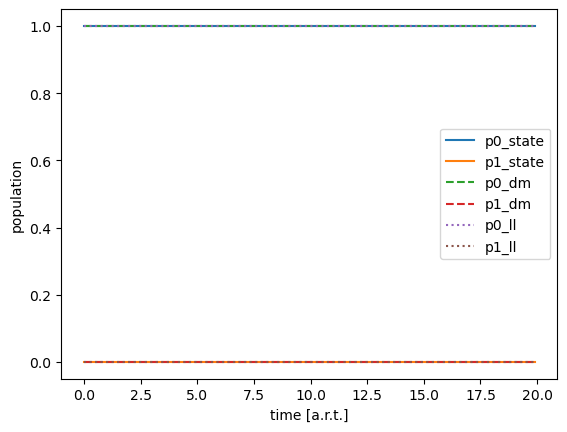

In [2]:
'''parameters'''
hbar = 1.
delta = 0.5
t_vals = np.arange(0,20,0.1)
hamiltonian = 0.5 * delta * np.array([[1,0],[0,-1]])
# hamiltonian = 0.5 * delta * np.array([[0,1],[1,0]]) # sigma_x, off-diagonal elems control level transitions

'''density matrix formalism'''
f0 = np.array([1,0])
dm_hilbert_0 = np.outer(f0,f0.conjugate())
unitary_t = np.array([expm(-1j / hbar * hamiltonian * t_val) for t_val in t_vals])
dm_hilbert_t = np.array([unitary @ dm_hilbert_0 @ unitary.conjugate().T for unitary in unitary_t])
p0_density_matrix = [dm[0,0].real for dm in dm_hilbert_t]
p1_density_matrix = [dm[1,1].real for dm in dm_hilbert_t]

'''state vector formalism'''
# ONLY PURE state can be depicted by state vector!
ft = np.array([unitary @ f0 for unitary in unitary_t])
p0_state_vec = [(ff[0].conjugate() * ff[0]).real for ff in ft]
p1_state_vec = [(ff[1].conjugate() * ff[1]).real for ff in ft]

'''Liouville space formalism'''
n = 2
pauli = PauliAlgebra(n)
basis = pauli.basis.copy()
dm_liouville_0 = pauli.get_coef(dm_hilbert_0)
print(pauli.get_liouvillian(hamiltonian, hbar))
superU = pauli.get_superU(t_vals=t_vals, hamiltonian=hamiltonian)
dm_liouville_t = [u @ dm_liouville_0 for u in superU]

dm_hilbert_t = []
for i in range(len(dm_liouville_t)):
    tmp = np.zeros((n,n),dtype=complex)
    for coef, bb in zip(dm_liouville_t[i], basis):
        tmp += coef * bb
    dm_hilbert_t.append(tmp)
dm_hilbert_t = np.array(dm_hilbert_t)
p0_liouville = [dm[0,0].real for dm in dm_hilbert_t]
p1_liouville = [dm[1,1].real for dm in dm_hilbert_t]

'''population probability '''
plt.plot(t_vals, p0_state_vec)
plt.plot(t_vals, p1_state_vec)
plt.plot(t_vals, p0_density_matrix, '--')
plt.plot(t_vals, p1_density_matrix, '--')
plt.plot(t_vals, p0_liouville, ':')
plt.plot(t_vals, p1_liouville, ':')
plt.xlabel("time [a.r.t.]")
plt.ylabel("population")
plt.legend(["p0_state","p1_state","p0_dm","p1_dm","p0_ll","p1_ll"])
plt.show()

$$H = \frac{\Delta}{2}\sigma_z$$
$$\begin{split}
& \hat{\hat{\mathcal{L}}} = \begin{bmatrix}
    0 & -\Delta & 0 & 0 \\
    \Delta & 0 & 0 & 0 \\
    0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 \\
\end{bmatrix} \\
& \hat{\hat{\mathcal{U}}} = e^{\hat{\hat{\mathcal{L}}}t} = \begin{bmatrix}
\cos t\Delta & -\sin t\Delta & 0 & 0 \\
\sin t\Delta & \cos t\Delta & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix} \\
\end{split}$$

$$\rho = \sum_{ij}|i\rangle\langle i| \rho |j\rangle\langle j| = \sum_{ij}\rho_{ij}|i\rangle\langle j|$$

$|0\rangle = \begin{bmatrix} 0 \\ 1 \\\end{bmatrix}$, $|1\rangle = \begin{bmatrix} 1 \\ 0 \\\end{bmatrix}$, $\rho = \begin{bmatrix}
\rho_{00} & \rho_{01} \\
\rho_{10} & \rho_{11} \\
\end{bmatrix} = \rho_{00}|0\rangle\langle 0| + \rho_{01}|0\rangle\langle 1| + \rho_{10}|1\rangle\langle 0| + \rho_{11}|1\rangle\langle 1| = \sigma_x \Re{\rho_{01}} + \sigma_y\Im{\rho_{01}} + \frac{\rho_{11} - \rho_{00}}{2}\sigma_z + \frac{1}{2}$

$|f\rangle = \begin{bmatrix} 1 \\ 0 \\\end{bmatrix}$, $\rho = |f\rangle\langle f| = \begin{bmatrix}
1 & 0 \\
0 & 0 \\
\end{bmatrix} = \frac{1}{2}\sigma_z + \frac{1}{2}I$, $|\rho\rangle\rangle = \begin{bmatrix}0 \\ 0 \\ 0.5 \\ 0.5 \\\end{bmatrix}$. 


$$|\rho(t)\rangle\rangle = \begin{bmatrix}
    \cos t\Delta & -\sin t\Delta & 0 & 0 \\
    \sin t\Delta & \cos t\Delta & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1 \\
\end{bmatrix} \cdot \begin{bmatrix}
    0 \\
    0 \\ 
    0.5 \\
    0.5 \\
\end{bmatrix} = \begin{bmatrix}
    0 \\
    0 \\
    0.5 \\
    0.5 \\
\end{bmatrix} = 0.5\sigma_z + 0.5I = \begin{bmatrix}
    1 & 0 \\
    0 & 0 \\
\end{bmatrix},$$

which means density matrix is stationary.

```python

# different case
hamiltonian = 0.5 * delta * np.array([[0,1],[1,0]])
```